In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#不能调用numpy，根据原理写
#功能：直方图均衡化
'''
输入：灰度图像
输出：直方图均衡化后的图像，输出图像的直方图，输入图像的直方图

'''
input_image = cv2.imread('Q3_1_1.tif',cv2.IMREAD_GRAYSCALE)
def hist_equ_12210634(input_image):
    input_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = input_image.flatten()
    for i in range(256):
        input_hist[i] = np.sum(img_flat == i)
    p_hist = input_hist / np.sum(input_hist)
    cdf = np.cumsum(p_hist)
    T = 255 * cdf
    # print(T)
    output_image = T[input_image].astype(np.uint8)
    output_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = output_image.flatten()
    for i in range(256):
        output_hist[i] = np.sum(img_flat == i)
    return (output_image,output_hist,input_hist)
img1 = cv2.imread('Q3_1_1.tif',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Q3_1_2.tif',cv2.IMREAD_GRAYSCALE)
output_image1,output_hist1,input_hist1 = hist_equ_12210634(img1)
output_image2,output_hist2,input_hist2 = hist_equ_12210634(img2)
cv2.imshow('input_image1',img1)
cv2.imshow('input_image2',img2)
cv2.imshow('output_image1',output_image1)
cv2.imshow('output_image2',output_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/wu/.local/lib/python3.10/site-packages/cv2/qt/plugins"
QObject::moveToThread: Current thread (0x2b93e20) is not the object's thread (0x317c430).
Cannot move to target thread (0x2b93e20)

QObject::moveToThread: Current thread (0x2b93e20) is not the object's thread (0x317c430).
Cannot move to target thread (0x2b93e20)

QObject::moveToThread: Current thread (0x2b93e20) is not the object's thread (0x317c430).
Cannot move to target thread (0x2b93e20)

QObject::moveToThread: Current thread (0x2b93e20) is not the object's thread (0x317c430).
Cannot move to target thread (0x2b93e20)

QObject::moveToThread: Current thread (0x2b93e20) is not the object's thread (0x317c430).
Cannot move to target thread (0x2b93e20)

QObject::moveToThread: Current thread (0x2b93e20) is not the object's thread (0x317c430).
Cannot move to target thread (0x2b93e20)

QObject::moveToThread: Current thread (0x2b93e20) is not the object's thread (0x

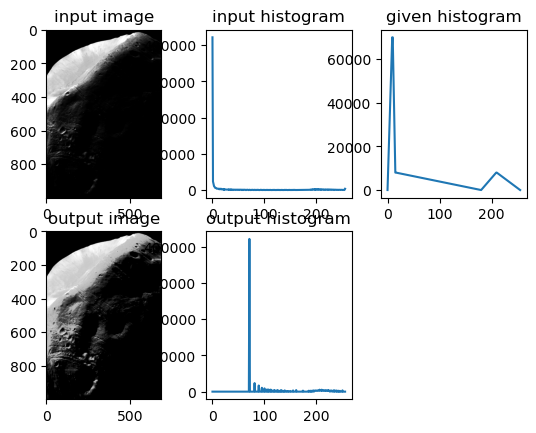

In [20]:
#直方图matching
# def hist_match_12210634(input_image,spec_hist):
#     return (output_image,output_hist,input_hist)
spec_hist = np.hstack((np.linspace(0,7e4,10),np.linspace(7e4,0.8e4,6),np.linspace(0.8e4,0,180-16),np.linspace(0,0.8e4,210-180),np.linspace(0.8e4,0,256-210)))




def hist_match_12210634(input_image,spec_hist):
    #计算输入图像的直方图
    input_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = input_image.flatten()
    for i in range(256):
        input_hist[i] = np.sum(img_flat == i)

    #计算概率，累积分布，映射函数T
    p_hist = input_hist / np.sum(input_hist)
    p_cdf = np.cumsum(p_hist)
    T = (255 * p_cdf).astype(np.uint8)

    #根据给定直方图，计算映射函数G
    p_z = spec_hist / np.sum(spec_hist)
    z_cdf = np.cumsum(p_z)
    G = (255 * z_cdf).astype(np.uint8)

    #计算映射函数的反函数
    G_inverse = np.zeros((256,1))
    rG = []
    for i in range(256):
        indics = np.where(G==i)[0]
        if indics.size > 0:
            indics = np.where(G==i)[0]
            G_inverse[i]=indics[indics.size//2]
            rG.append(i)
    #对于没有出现在映射函数中的值，使用线性插值
    for ri in range(len(rG)-1):
        left_index= rG[ri]
        right_index = rG[ri+1]
        interp = np.linspace(G_inverse[left_index],G_inverse[right_index],right_index-left_index+1)
        G_inverse[left_index+1:right_index] = interp[1:-1]
    G_inverse = np.round(G_inverse).astype(np.uint8).flatten()

    output_image = G_inverse[T[input_image]]

    #计算输出图像的直方图
    output_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = output_image.flatten()
    for i in range(256):
        output_hist[i] = np.sum(img_flat == i)
    return (output_image,output_hist,input_hist)

img3_2= cv2.imread('Q3_2.tif', cv2.IMREAD_GRAYSCALE)
output_image,output_hist,input_hist = hist_match_12210634(img3_2,spec_hist)

#输入图像，输出图像，各自直方图，和给定直方图
plt.subplot(2,3,1)
plt.imshow(img3_2,cmap='gray')
plt.title('input image')
plt.subplot(2,3,2)
plt.plot(input_hist)
plt.title('input histogram')
plt.subplot(2,3,3)
plt.plot(spec_hist)
plt.title('given histogram')
plt.subplot(2,3,4)
plt.imshow(output_image,cmap='gray')
plt.title('output image')
plt.subplot(2,3,5)
plt.plot(output_hist)
plt.title('output histogram')
plt.show()
        


array([[219, 219, 219, ..., 221, 221, 221],
       [219, 219, 219, ..., 221, 221, 221],
       [219, 219, 219, ..., 221, 221, 220],
       ...,
       [220, 219, 219, ..., 222, 222, 222],
       [220, 220, 219, ..., 222, 222, 222],
       [220, 220, 219, ..., 222, 222, 222]], dtype=uint8)

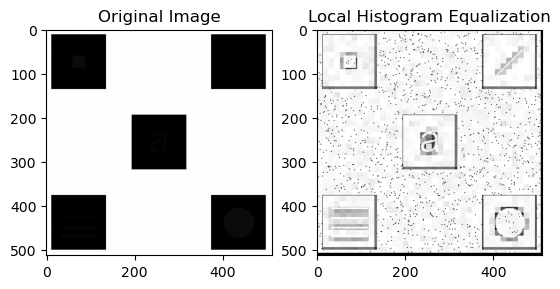

In [7]:
#局部直方图处理
# def local_hist_equ_12210634(input_img,m_size):

def local_hist_equ_12210634(input_img,m_size):
    #获取inputhist
    input_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = input_image.flatten()
    for i in range(256):
        input_hist[i] = np.sum(img_flat == i)

    ws = m_size
    pd = m_size//2
    output_image = np.zeros(input_img.shape)
    
    for i in range(pd,input_img.shape[0]-pd,ws):
        for j in range(pd,input_img.shape[1]-pd,ws):
            patch = input_img[i-m_size//2:i+m_size//2+1,j-m_size//2:j+m_size//2+1]
            output_image[i-pd:i+pd+1,j-pd:j+pd+1],_,_ = hist_equ_12210634(patch)
    #获取outputhist
    output_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = output_image.flatten()
    for i in range(256):
        output_hist[i] = np.sum(img_flat == i)
    return (output_image,output_hist,input_hist)

img3_3 = cv2.imread('Q3_3.tif',0)
m_size = 13
output_image3,output_hist3,input_hist3 = local_hist_equ_12210634(img3_3,m_size)


#展示结果
plt.subplot(1,2,1)
plt.imshow(img3_3,cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(output_image3,cmap='gray')
plt.title('Local Histogram Equalization')
plt.show()

In [ ]:
#椒盐噪声，采用滤波处理
def 